# Interference and Inhibition meta analysis
#### Code written by Scott Isherwood, Max Keuken
#### V.01

    Goal of the notebook is to run a coordinate based meta analysis using NiMARE. We are using NiMARE instead of GingerALE as the GingerALE code took forever to run and even then there was a chance of it just crashing. After a search for ohter coordinate based meta analysis software we came across NiMARE, a python package that allows you to run meta-analysis. A number of people are working on this package (e.g. Tal Yarkoni) but the main contact is Taylor Salo. 
    
    The notebook has 4 sections:
    a) Importing modules and setting parameters
    b) Selecting the relevant studies for a given contrast into an input file
    c) Prepare the input file for NiMARE
    d) Run the actual meta-analysis

## Import modules and setting parameters 

In [1]:
# Importing Modules
import os, shutil, nimare, numpy as np, nibabel as nb, pandas as pd
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from atlasreader import create_output
from glob import glob as glob

# Setting the paths 
projectFolder = '/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/SST-GNG'
rawInputTxtFiles = os.path.join(projectFolder+'/coordinateTxtFiles')
inputDirNiMARE = os.path.join(projectFolder+'/nimare-Input')
outputDirNiMARE = os.path.join(projectFolder+'/nimare-Output')

# Setting a number of arrays to loop through
inputFilesRaw = ['contrastSSTInput.txt', 'contrastGNGInput.txt']
inputFilesNiMARE = ['contrastSSTInput.json', 'contrastGNGInput.json']
contrastFoldersNiMARE = ['SST', 'GNG']

# ALE Parameters
VoxelThresholdPvalue = 0.001
numberOfIterations = 10000
numberOfCores = 7

/Users/mckitchen/miniconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



## Selecting the relevant studies for a given contrast into an input file

In [5]:
# Select all the relevant studies for that given contrast
#. 
#. Note that:
#. - there were 4 studies in talairach space that were first converted to MNI space using the icbm2tal tool as implemented in gingerALE (V3.0.2)
#. - there was 1 study that met al the inclusion criteria but did not find any significant clusters (Salzer et al. 2018) and was removed from the 
#.   analysis
#. 
# Get all the single coordinates as list
file_list = glob(rawInputTxtFiles+'/*.txt')

#####
# Define the different contrasts by selecting the corresponding txt files
#
# SST contrast
contrastSST = {s for s in file_list for xs in ['StopS>GoS'] if xs in s}
print('\nWe have the following number of contrasts included for the SST contrasts:', len(contrastSST))
#
# GNG contrasts 
contrastGNG = {s for s in file_list for xs in ['NoGo>Go'] if xs in s}
print('\nWe have the following number of contrasts included for the GNG contrasts:', len(contrastGNG))

#####
# Concatenate all the txt files that are part of the contrast
#. while starting each txt file on a new line.
contrasts = [contrastSST, contrastGNG]
outputfiles = ['contrastSSTInput.txt', 'contrastGNGInput.txt']
# For the given contrasts concatenate the different studies in a single txt file 
#. what then is used as an input file for gingerALE:
for i in range(0, len(contrasts)):
    with open(os.path.join(inputDirNiMARE, outputfiles[i]), 'wb') as outputFile:
        for file in contrasts[i]:
            with open(file,'rb') as fd:
                shutil.copyfileobj(fd, outputFile)
            outputFile.write(b'\n')


We have the following number of contrasts included for the SST contrasts: 26

We have the following number of contrasts included for the GNG contrasts: 18


## Run the actual meta-analysis

In [6]:
# Running the main ALE contrasts analysis with NiMARE (v.0.0.5)
for i in range(len(inputFilesRaw)):
    print('\nStarting ALE analysis...')
    print(inputDirNiMARE+'/'+inputFilesRaw[i])
    nimare.io.convert_sleuth_to_json(os.path.join(inputDirNiMARE+'/'+inputFilesRaw[i]), os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'+inputFilesNiMARE[i]) )
    nimare.workflows.ale_sleuth_workflow(os.path.join(inputDirNiMARE+'/'+inputFilesRaw[i]), 
                                         output_dir = os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'),
                                         prefix=contrastFoldersNiMARE[i], 
                                         n_iters= numberOfIterations, 
                                         v_thr= VoxelThresholdPvalue, 
                                         n_cores= numberOfCores)

INFO:nimare.workflows.ale:Loading coordinates...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:nimare.workflows.ale:Performing meta-analysis...



Starting ALE analysis...
/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/SST-GNG/nimare-Input/contrastSSTInput.txt


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.workflows.ale:Saving output maps...
INFO:nimare.workflows.ale:Workflow completed.
INFO:nimare.workflows.ale:
An activation likelihood estimation (ALE; Turkeltaub, Eden, Jones, & Zeffiro,
2002; Eickhoff, Bzdok, Laird, Kurth, & Fox, 2012; Turkeltaub et al., 2012)
meta-analysis was performed using NiMARE. The input dataset included 624
foci from 675 participants across 26 studies/experiments.

Modeled activation maps were generated for each study/experiment by convolving
each focus with a Gaussian kernel determined by sample size.
For voxels with overlapping kernels, the maximum value was retained.
The modeled activation maps were rendered in MNI 152 space (Fonov et al., 2009;
Fonov et al., 2011) at 2x2x2mm resolution. A map of ALE values was then
computed for the sample as the union of modeled activation values across
studies/experiments. Voxelwise statistical significance was determined based on
an analytically derived null distribution using the method described in
Eickhoff


Starting ALE analysis...
/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/SST-GNG/nimare-Input/contrastGNGInput.txt


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.workflows.ale:Saving output maps...
INFO:nimare.workflows.ale:Workflow completed.
INFO:nimare.workflows.ale:
An activation likelihood estimation (ALE; Turkeltaub, Eden, Jones, & Zeffiro,
2002; Eickhoff, Bzdok, Laird, Kurth, & Fox, 2012; Turkeltaub et al., 2012)
meta-analysis was performed using NiMARE. The input dataset included 321
foci from 443 participants across 18 studies/experiments.

Modeled activation maps were generated for each study/experiment by convolving
each focus with a Gaussian kernel determined by sample size.
For voxels with overlapping kernels, the maximum value was retained.
The modeled activation maps were rendered in MNI 152 space (Fonov et al., 2009;
Fonov et al., 2011) at 2x2x2mm resolution. A map of ALE values was then
computed for the sample as the union of modeled activation values across
studies/experiments. Voxelwise statistical significance was determined based on
an analytically derived null distribution using the method described in
Eickhoff


Done! Showing the results:
/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/SST-GNG/nimare-Input/contrastSSTInput.txt


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,harvard_oxford,juelich
0,1,38,20,-4,3.71902,6624,48.19% Insula_R; 18.48% Frontal_Inf_Orb_2_R; 1...,42.87% Right_Insular_Cortex; 35.87% Right_Fron...,48.31% no_label; 29.47% WM_Inferior_occipito-f...
1,2,8,16,50,3.71902,5744,40.95% Supp_Motor_Area_R; 21.59% Supp_Motor_Ar...,43.45% Right_Superior_Frontal_Gyrus; 27.58% Ri...,61.56% GM_Premotor_cortex_BA6_R; 22.01% no_lab...
2,3,48,10,30,3.71902,5416,38.26% Precentral_R; 36.78% Frontal_Inf_Oper_R...,38.70% Right_Inferior_Frontal_Gyrus_pars_operc...,67.36% GM_Broca's_area_BA44_R; 19.79% GM_Premo...
3,4,-34,18,-2,3.71902,4912,68.40% Insula_L; 14.50% Frontal_Inf_Tri_L; 8.7...,56.35% Left_Insular_Cortex; 19.38% Left_Fronta...,66.12% no_label; 17.92% GM_Broca's_area_BA44_L...
4,5,38,-60,-12,3.71902,3728,55.36% Fusiform_R; 32.19% Temporal_Inf_R; 8.58...,43.78% Right_Temporal_Occipital_Fusiform_Corte...,50.64% no_label; 29.83% GM_Visual_cortex_V4_R;...
5,6,60,-44,14,3.71902,3720,41.51% Temporal_Mid_R; 34.41% Temporal_Sup_R; ...,52.90% Right_Supramarginal_Gyrus_posterior_div...,38.49% GM_Inferior_parietal_lobule_PFm_R; 24.9...
6,7,-36,-64,-12,3.71902,2800,60.57% Fusiform_L; 21.71% Occipital_Inf_L; 8.2...,47.14% Left_Temporal_Occipital_Fusiform_Cortex...,46.29% no_label; 20.29% GM_Visual_cortex_V4_L;...
7,8,-60,-46,32,3.71902,2056,39.69% SupraMarginal_L; 28.40% no_label; 24.51...,95.33% Left_Supramarginal_Gyrus_posterior_divi...,61.87% GM_Inferior_parietal_lobule_PF_L; 20.62...
8,9,2,-22,-4,2.57583,1064,81.95% no_label; 10.53% Thalamus_R; 7.52% Thal...,33.83% Left_Thalamus; 32.33% Right_Thalamus; 3...,96.99% no_label
9,10,50,-22,-4,2.48377,1040,63.85% Temporal_Sup_R; 18.46% no_label; 14.62%...,42.31% Right_Superior_Temporal_Gyrus_posterior...,48.46% GM_Insula_Id1_R; 14.62% no_label; 13.85...



Done! Showing the results:
/Users/mckitchen/Documents/Werk/Shared/interference_in_the_subcortex/Revision/SupplementaryAnalysis/SST-GNG/nimare-Input/contrastGNGInput.txt


,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,harvard_oxford,juelich
0,1,32,18,-4,3.71902,4712,33.45% Insula_R; 29.88% Putamen_R; 25.47% no_l...,41.60% Right_Insular_Cortex; 29.37% Right_Puta...,49.92% no_label; 38.20% WM_Inferior_occipito-f...
1,2,40,0,48,3.71902,2992,59.63% Precentral_R; 20.05% Frontal_Sup_2_R; 1...,47.06% Right_Precentral_Gyrus; 45.99% Right_Mi...,83.16% GM_Premotor_cortex_BA6_R; 13.10% no_label
2,3,-46,-78,-2,3.71902,1784,68.16% Occipital_Mid_L; 21.52% Occipital_Inf_L...,100.00% Left_Lateral_Occipital_Cortex_inferior...,62.78% GM_Visual_cortex_V5_L; 25.11% no_label;...
3,4,-30,20,0,3.71902,1608,87.06% Insula_L; 9.45% no_label,66.67% Left_Insular_Cortex; 18.41% Left_Fronta...,81.59% no_label; 9.95% WM_Inferior_occipito-fr...
4,5,34,-68,46,3.71902,1504,30.85% Parietal_Sup_R; 25.53% Angular_R; 25.53...,100.00% Right_Lateral_Occipital_Cortex_superio...,34.57% GM_Superior_parietal_lobule_7A_R; 17.55...
5,6,50,-72,-4,3.29053,944,39.83% Temporal_Inf_R; 36.44% Temporal_Mid_R; ...,100.00% Right_Lateral_Occipital_Cortex_inferio...,61.86% GM_Visual_cortex_V5_R; 35.59% no_label
6,7,-44,-6,48,2.03154,800,94.00% Precentral_L; 6.00% Postcentral_L,100.00% Left_Precentral_Gyrus,100.00% GM_Premotor_cortex_BA6_L
7,8,4,-2,60,2.03154,800,71.00% Supp_Motor_Area_R; 28.00% Supp_Motor_Ar...,72.00% Right_Juxtapositional_Lobule_Cortex_(fo...,85.00% GM_Premotor_cortex_BA6_R; 14.00% GM_Pre...
8,9,-24,8,6,3.71902,584,91.78% Putamen_L; 8.22% no_label,97.26% Left_Putamen,97.26% no_label


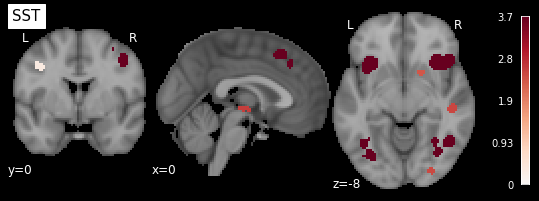

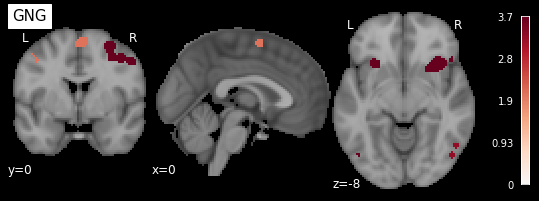

In [7]:
for i in range(len(inputFilesRaw)):
    print('\nDone! Showing the results:')
    print(inputDirNiMARE+'/'+inputFilesRaw[i])
    zmap = nb.nifti1.load(os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'+contrastFoldersNiMARE[i]+'_z_level-cluster_corr-FWE_method-montecarlo.nii.gz'))
    plot_stat_map(
        zmap,
        cut_coords=[0, 0, -8],
        draw_cross=False,
        cmap="RdBu_r",
        title= contrastFoldersNiMARE[i],
        black_bg=True
    )
    
    
    # Use atlas reader to extract the cluster table
    # Using the Z value associated with a onesided p=0.05 to threshold the Z-map
    # Note that the cluster corrected map will have binary clusters in terms of values.
    # Therefore you will only get the COM of a cluster, which also means that it can actually be 
    # OUTSIDE of a given cluster.. (due to it's geometric shape). This is why I', using Atlas reader
    # because it will output the overlap of the entire cluster given the areas
    create_output(zmap, 
                  outdir= os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'), 
                  atlas= ['aal', 'harvard_oxford', 'juelich'], 
                  voxel_thresh=1.645, 
                  direction = 'pos', 
                  cluster_extent = 64)
    overlapClusters = pd.read_csv(os.path.join(outputDirNiMARE+'/'+contrastFoldersNiMARE[i]+'/'+'atlasreader_clusters.csv'))
    display(overlapClusters)

In [14]:
# To create the seperate cluster nifti files I used some tools from FSL:
#. cluster -z Interference_z_level-cluster_corr-FWE_method-montecarlo.nii.gz -t 1.645 -o cluster_index
#. fslmaths -dt int cluster_index -thr 9 -uthr 9 -bin cluster_mask1
#. fslmaths -dt int cluster_index -thr 8 -uthr 8 -bin cluster_mask2
#. Etc etc. Note that the cluster order is in reverse of what atlas reader gives you. All clusters have
#. been visually inspected in MANGO to ensure that the cluster ID in the manuscript corresponds to the 
#. cluster file name. 

In [3]:
# SSTminGNG
print('\nStarting ALE analysis...')
nimare.workflows.ale_sleuth_workflow(os.path.join(inputDirNiMARE+'/'+inputFilesRaw[0]), 
                                     sleuth_file2 = os.path.join(inputDirNiMARE+'/'+inputFilesRaw[1]), 
                                     output_dir = os.path.join(outputDirNiMARE+'/'+'SSTminGNG/'),
                                     prefix='SSTminGNG', 
                                     n_iters= numberOfIterations, 
                                     v_thr= VoxelThresholdPvalue, 
                                     n_cores= numberOfCores)



INFO:nimare.workflows.ale:Loading coordinates...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:nimare.workflows.ale:Performing meta-analyses...



Starting ALE analysis...


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.workflows.ale:Saving output maps...
INFO:nimare.workflows.ale:Workflow completed.
INFO:nimare.workflows.ale:
Activation likelihood estimation (ALE; Turkeltaub, Eden, Jones, & Zeffiro,
2002; Eickhoff, Bzdok, Laird, Kurth, & Fox, 2012; Turkeltaub et al., 2012)
meta-analyses were performed using NiMARE for each of two datasets.
The first input dataset included 624 foci from 675 participants
across 26 studies/experiments. The second input dataset included
321 foci from 443 participants across 18 studies/experiments.

Foci were convolved with Gaussian kernels determined by sample size,
implemented on the MNI 152 template (Fonov et al., 2009; Fonov et al., 2011)
at 2x2x2mm resolution.

-> If the cluster-level FWE-corrected results were used, include the following:
A cluster-forming threshold of p < 0.001 was used to perform cluster-level FWE
correction. 10000 iterations were performed to estimate a null distribution
of cluster sizes, in which the locations of coordinates were ran

In [4]:
# GNGminSST
print('\nStarting ALE analysis...')
nimare.workflows.ale_sleuth_workflow(os.path.join(inputDirNiMARE+'/'+inputFilesRaw[1]), 
                                     sleuth_file2 = os.path.join(inputDirNiMARE+'/'+inputFilesRaw[0]), 
                                     output_dir = os.path.join(outputDirNiMARE+'/'+'GNGminSST/'),
                                     prefix='GNGminSST', 
                                     n_iters= numberOfIterations, 
                                     v_thr= VoxelThresholdPvalue, 
                                     n_cores= numberOfCores)

INFO:nimare.workflows.ale:Loading coordinates...
INFO:nimare.workflows.ale:Performing meta-analyses...



Starting ALE analysis...


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/10000 [00:00<?, ?it/s]

INFO:nimare.workflows.ale:Saving output maps...
INFO:nimare.workflows.ale:Workflow completed.
INFO:nimare.workflows.ale:
Activation likelihood estimation (ALE; Turkeltaub, Eden, Jones, & Zeffiro,
2002; Eickhoff, Bzdok, Laird, Kurth, & Fox, 2012; Turkeltaub et al., 2012)
meta-analyses were performed using NiMARE for each of two datasets.
The first input dataset included 321 foci from 443 participants
across 18 studies/experiments. The second input dataset included
624 foci from 675 participants across 26 studies/experiments.

Foci were convolved with Gaussian kernels determined by sample size,
implemented on the MNI 152 template (Fonov et al., 2009; Fonov et al., 2011)
at 2x2x2mm resolution.

-> If the cluster-level FWE-corrected results were used, include the following:
A cluster-forming threshold of p < 0.001 was used to perform cluster-level FWE
correction. 10000 iterations were performed to estimate a null distribution
of cluster sizes, in which the locations of coordinates were ran

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,harvard_oxford,juelich
0,1,-56,-36,32,3.50082,3976,40.44% Parietal_Inf_L; 38.83% SupraMarginal_L;...,68.81% Left_Supramarginal_Gyrus_anterior_divis...,70.02% GM_Inferior_parietal_lobule_PF_L; 16.50...
1,2,22,-74,-14,3.38374,3064,40.99% Lingual_R; 39.43% Fusiform_R; 10.70% Ce...,87.21% Right_Occipital_Fusiform_Gyrus; 9.92% R...,40.73% GM_Visual_cortex_V3V_R; 32.90% GM_Visua...
2,3,4,24,36,3.50478,2920,41.37% Frontal_Sup_2_R; 19.45% Frontal_Sup_Med...,37.26% Right_Superior_Frontal_Gyrus; 30.68% Le...,77.81% no_label; 21.92% GM_Premotor_cortex_BA6_R
3,4,-40,12,-6,3.52245,1960,74.69% Insula_L; 9.39% Temporal_Pole_Sup_L; 5....,62.45% Left_Insular_Cortex; 21.63% Left_Fronta...,70.61% no_label; 16.73% GM_Broca's_area_BA44_L...
4,5,-26,-56,-2,3.25300,1632,36.27% Fusiform_L; 33.82% no_label; 27.45% Lin...,42.65% Left_Temporal_Occipital_Fusiform_Cortex...,49.51% WM_Optic_radiation_L; 22.06% no_label; ...


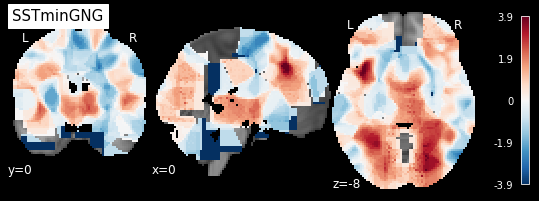

In [5]:
# SSTminGNG
zmap = nb.nifti1.load(os.path.join(outputDirNiMARE+'/SSTminGNG/SSTminGNG_subtraction_z_desc-group1MinusGroup2.nii.gz'))
plot_stat_map(
    zmap,
    cut_coords=[0, 0, -8],
    draw_cross=False,
    cmap="RdBu_r",
    title= 'SSTminGNG',
    black_bg=True
)


# Use atlas reader to extract the cluster table
# Using the Z value associated with a onesided p=0.001 to threshold the Z-map
# Note that the cluster corrected map will have binary clusters in terms of values.
# Therefore you will only get the COM of a cluster, which also means that it can actually be 
# OUTSIDE of a given cluster.. (due to it's geometric shape). This is why I', using Atlas reader
# because it will output the overlap of the entire cluster given the areas
create_output(zmap, 
              outdir= os.path.join(outputDirNiMARE+'/SSTminGNG/'), 
              atlas= ['aal', 'harvard_oxford', 'juelich'], 
              voxel_thresh=3.091, 
              direction = 'pos', 
              cluster_extent = 64)
overlapClusters = pd.read_csv(os.path.join(outputDirNiMARE+'/SSTminGNG/'+'atlasreader_clusters.csv'))
display(overlapClusters)

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,harvard_oxford,juelich
0,1,26,-16,50,3.44816,1376,70.35% no_label; 29.07% Precentral_R,51.16% no_label; 48.26% Right_Precentral_Gyrus,43.60% GM_Premotor_cortex_BA6_R; 33.72% WM_Cor...


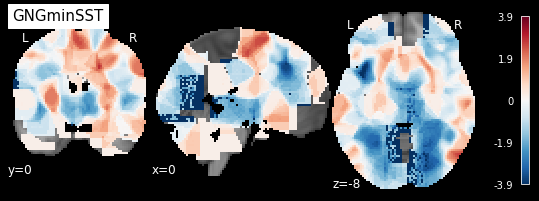

In [7]:
# Interference MINUS Inhibition
zmap = nb.nifti1.load(os.path.join(outputDirNiMARE+'/GNGminSST/GNGminSST_subtraction_z_desc-group1MinusGroup2.nii.gz'))
plot_stat_map(
    zmap,
    cut_coords=[0, 0, -8],
    draw_cross=False,
    cmap="RdBu_r",
    title= 'GNGminSST',
    black_bg=True
)


# Use atlas reader to extract the cluster table
# Using the Z value associated with a onesided p=0.001 to threshold the Z-map
# Note that the cluster corrected map will have binary clusters in terms of values.
# Therefore you will only get the COM of a cluster, which also means that it can actually be 
# OUTSIDE of a given cluster.. (due to it's geometric shape). This is why I', using Atlas reader
# because it will output the overlap of the entire cluster given the areas
create_output(zmap, 
              outdir= os.path.join(outputDirNiMARE+'/GNGminSST/'), 
              atlas= ['aal', 'harvard_oxford', 'juelich'], 
              voxel_thresh=3.091, 
              direction = 'pos', 
              cluster_extent = 64)
overlapClusters = pd.read_csv(os.path.join(outputDirNiMARE+'/GNGminSST/'+'atlasreader_clusters.csv'))
display(overlapClusters)